In [43]:
import pandas as pd 
from sklearn.metrics import average_precision_score


In [44]:
prefix="/oak/stanford/groups/akundaje/projects/alzheimers_parkinsons/dopa_neurons_cluster_10/predictions/train/DopaNeuronsCluster10"

In [45]:
auprc=[]
pos_accuracy=[] 
neg_accuracy=[] 


In [46]:
for i in range(0,10): 
    pos_preds=pd.read_csv(prefix+'.'+str(i)+'.positives',header=None,sep='\t')
    neg_preds=pd.read_csv(prefix+'.'+str(i)+'.negatives',header=None,sep='\t')
    pos_preds[2]=1
    pos_accuracy.append(sum(pos_preds[1]>0)/pos_preds.shape[0])    
    neg_preds[2]=-1
    neg_accuracy.append(sum(neg_preds[1]<0)/neg_preds.shape[0])
    merged=pd.concat([pos_preds,neg_preds],axis=0)
    cur_auprc=average_precision_score(merged[2],merged[1])
    auprc.append(cur_auprc)


In [47]:
auprc

[0.9861921178895352,
 0.9862430026605772,
 0.9854688114346017,
 0.9856914523777244,
 0.985432057744421,
 0.9855165865912663,
 0.9859275863495055,
 0.9867644108462924,
 0.9859875952059998,
 0.9861052585056296]

In [48]:
pos_accuracy

[0.9511422917790969,
 0.9525876460767947,
 0.9514590900144925,
 0.951665825340737,
 0.9507395314813823,
 0.9511667798306115,
 0.9518353645187185,
 0.9534866455073594,
 0.9525057438253877,
 0.9528931684355593]

In [49]:
neg_accuracy

[0.9487677639863284,
 0.9508625486922648,
 0.9478628043871107,
 0.9489435350111776,
 0.9493657335545683,
 0.9496658685630561,
 0.9495183536451872,
 0.9495703175752176,
 0.949615881677197,
 0.9492599287670253]

In [50]:
from plotnine import * 

In [51]:
df=pd.DataFrame({
    'fold':[str(i) for i in list(range(10))],
    'auprc':auprc,
    'positive_accuracy':pos_accuracy,
    'negative_accuracy':neg_accuracy})

/users/annashch/miniconda3/lib/python3.7/site-packages/plotnine-0.4.0-py3.7.egg/plotnine/coords/coord_cartesian.py:31: MatplotlibDeprecationWarning: 
The Bunch class was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use types.SimpleNamespace instead.
  self.limits = Bunch(xlim=xlim, ylim=ylim)
/users/annashch/miniconda3/lib/python3.7/copy.py:274: MatplotlibDeprecationWarning: 
The Bunch class was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use types.SimpleNamespace instead.
  y = func(*args)
/users/annashch/miniconda3/lib/python3.7/site-packages/plotnine-0.4.0-py3.7.egg/plotnine/scales/scale.py:99: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
/users/annashch/miniconda3/lib/python3.7/site-packages/plotnine-0.4.0-py3.7.egg/plotnine/facets/facet.py:151: MatplotlibDeprecationWarning: 
The Bunch class was depr

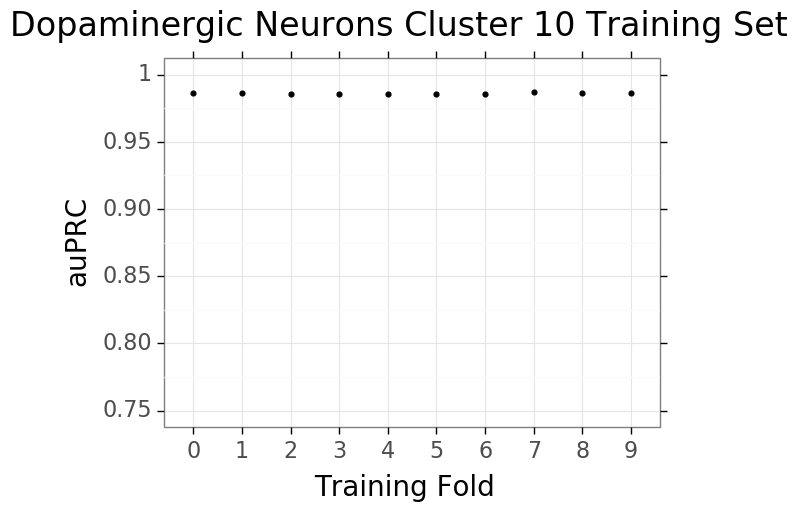

<ggplot: (8742548271992)>

In [52]:
p = ggplot(aes(x='fold', y='auprc'), df) + geom_point()+ ylim(0.75,1)+xlab("Training Fold") +ylab('auPRC')+ggtitle("Dopaminergic Neurons Cluster 10 Training Set ")+theme_bw(20)
p

/users/annashch/miniconda3/lib/python3.7/site-packages/plotnine-0.4.0-py3.7.egg/plotnine/coords/coord_cartesian.py:31: MatplotlibDeprecationWarning: 
The Bunch class was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use types.SimpleNamespace instead.
  self.limits = Bunch(xlim=xlim, ylim=ylim)
/users/annashch/miniconda3/lib/python3.7/copy.py:274: MatplotlibDeprecationWarning: 
The Bunch class was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use types.SimpleNamespace instead.
  y = func(*args)
/users/annashch/miniconda3/lib/python3.7/site-packages/plotnine-0.4.0-py3.7.egg/plotnine/scales/scale.py:99: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
/users/annashch/miniconda3/lib/python3.7/site-packages/plotnine-0.4.0-py3.7.egg/plotnine/facets/facet.py:151: MatplotlibDeprecationWarning: 
The Bunch class was depr

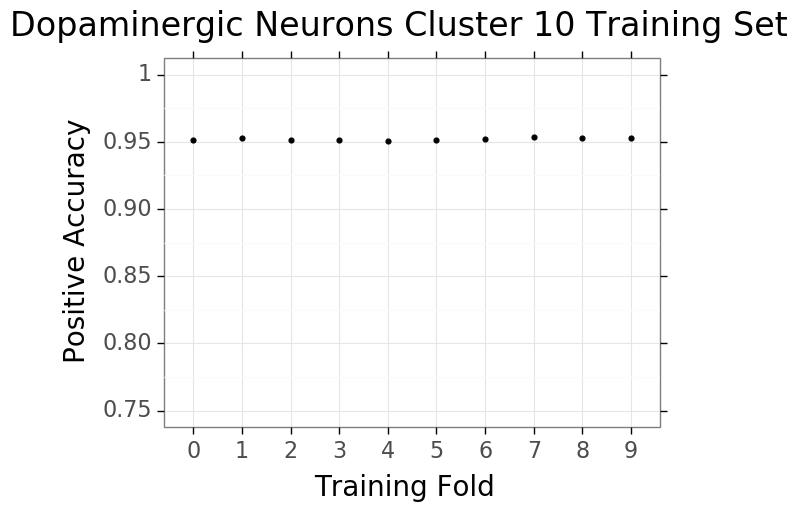

<ggplot: (8742574008426)>

In [53]:
p = ggplot(aes(x='fold', y='pos_accuracy'), df) + geom_point()+ ylim(0.75,1)+xlab("Training Fold") +ylab('Positive Accuracy')+ggtitle("Dopaminergic Neurons Cluster 10 Training Set ")+theme_bw(20)
p

/users/annashch/miniconda3/lib/python3.7/site-packages/plotnine-0.4.0-py3.7.egg/plotnine/coords/coord_cartesian.py:31: MatplotlibDeprecationWarning: 
The Bunch class was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use types.SimpleNamespace instead.
  self.limits = Bunch(xlim=xlim, ylim=ylim)
/users/annashch/miniconda3/lib/python3.7/copy.py:274: MatplotlibDeprecationWarning: 
The Bunch class was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use types.SimpleNamespace instead.
  y = func(*args)
/users/annashch/miniconda3/lib/python3.7/site-packages/plotnine-0.4.0-py3.7.egg/plotnine/scales/scale.py:99: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
/users/annashch/miniconda3/lib/python3.7/site-packages/plotnine-0.4.0-py3.7.egg/plotnine/facets/facet.py:151: MatplotlibDeprecationWarning: 
The Bunch class was depr

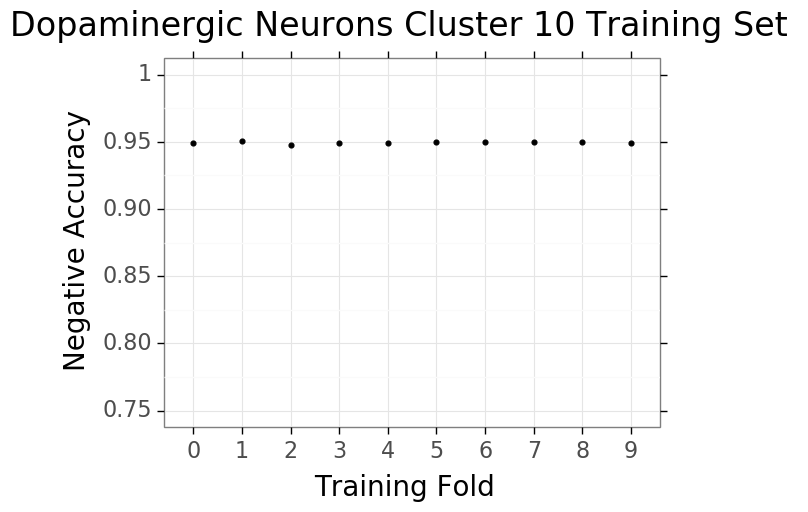

<ggplot: (8742437065529)>

In [54]:
p = ggplot(aes(x='fold', y='neg_accuracy'), df) + geom_point()+ ylim(0.75,1)+xlab("Training Fold") +ylab('Negative Accuracy')+ggtitle("Dopaminergic Neurons Cluster 10 Training Set ")+theme_bw(20)
p

In [55]:
prefix="/oak/stanford/groups/akundaje/projects/alzheimers_parkinsons/dopa_neurons_cluster_10/predictions/test/DopaNeuronsCluster10"

In [56]:
auprc=[]
pos_accuracy=[] 
neg_accuracy=[] 
for i in range(0,10): 
    pos_preds=pd.read_csv(prefix+'.'+str(i)+'.positives',header=None,sep='\t')
    neg_preds=pd.read_csv(prefix+'.'+str(i)+'.negatives',header=None,sep='\t')
    pos_preds[2]=1
    pos_accuracy.append(sum(pos_preds[1]>0)/pos_preds.shape[0])    
    neg_preds[2]=-1
    neg_accuracy.append(sum(neg_preds[1]<0)/neg_preds.shape[0])
    merged=pd.concat([pos_preds,neg_preds],axis=0)
    cur_auprc=average_precision_score(merged[2],merged[1])
    auprc.append(cur_auprc)


In [57]:
df=pd.DataFrame({
    'fold':[str(i) for i in list(range(10))],
    'auprc':auprc,
    'positive_accuracy':pos_accuracy,
    'negative_accuracy':neg_accuracy})

In [61]:
p1 = ggplot(aes(x='fold', y='auprc'), df) + geom_point()+ ylim(0.75,1)+xlab("Test Fold") +ylab('auPRC')+ggtitle("Dopaminergic Neurons Cluster 10 Test Set ")+theme_bw(20)
p2 = ggplot(aes(x='fold', y='pos_accuracy'), df) + geom_point()+ ylim(0.75,1)+xlab("Test Fold") +ylab('Positive Accuracy')+ggtitle("Dopaminergic Neurons Cluster 10 Test Set ")+theme_bw(20)
p3 = ggplot(aes(x='fold', y='neg_accuracy'), df) + geom_point()+ ylim(0.75,1)+xlab("Training Fold") +ylab('Negative Accuracy')+ggtitle("Dopmaniergic Neurons Cluster 10 Training Set ")+theme_bw(20)


/users/annashch/miniconda3/lib/python3.7/site-packages/plotnine-0.4.0-py3.7.egg/plotnine/coords/coord_cartesian.py:31: MatplotlibDeprecationWarning: 
The Bunch class was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use types.SimpleNamespace instead.
  self.limits = Bunch(xlim=xlim, ylim=ylim)
/users/annashch/miniconda3/lib/python3.7/copy.py:274: MatplotlibDeprecationWarning: 
The Bunch class was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use types.SimpleNamespace instead.
  y = func(*args)
/users/annashch/miniconda3/lib/python3.7/site-packages/plotnine-0.4.0-py3.7.egg/plotnine/scales/scale.py:99: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):


/users/annashch/miniconda3/lib/python3.7/site-packages/plotnine-0.4.0-py3.7.egg/plotnine/facets/facet.py:151: MatplotlibDeprecationWarning: 
The Bunch class was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use types.SimpleNamespace instead.
  scales = Bunch()
/users/annashch/miniconda3/lib/python3.7/site-packages/plotnine-0.4.0-py3.7.egg/plotnine/facets/layout.py:147: MatplotlibDeprecationWarning: 
The Bunch class was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use types.SimpleNamespace instead.
  return Bunch(x=xsc, y=ysc)
/users/annashch/miniconda3/lib/python3.7/site-packages/plotnine-0.4.0-py3.7.egg/plotnine/utils.py:557: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not is_string(var)


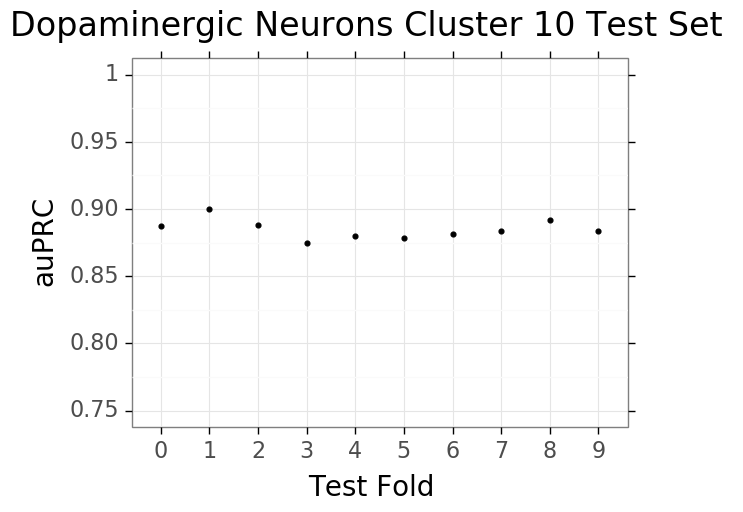

<ggplot: (-9223363294417535933)>

In [62]:
p1

/users/annashch/miniconda3/lib/python3.7/copy.py:274: MatplotlibDeprecationWarning: 
The Bunch class was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use types.SimpleNamespace instead.
  y = func(*args)
/users/annashch/miniconda3/lib/python3.7/site-packages/plotnine-0.4.0-py3.7.egg/plotnine/scales/scale.py:99: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
/users/annashch/miniconda3/lib/python3.7/site-packages/plotnine-0.4.0-py3.7.egg/plotnine/facets/facet.py:151: MatplotlibDeprecationWarning: 
The Bunch class was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use types.SimpleNamespace instead.
  scales = Bunch()
/users/annashch/miniconda3/lib/python3.7/site-packages/plotnine-0.4.0-py3.7.egg/plotnine/facets/layout.py:147: MatplotlibDeprecationWarning: 
The Bunch class was deprecated in Matplotlib 3.0 and will

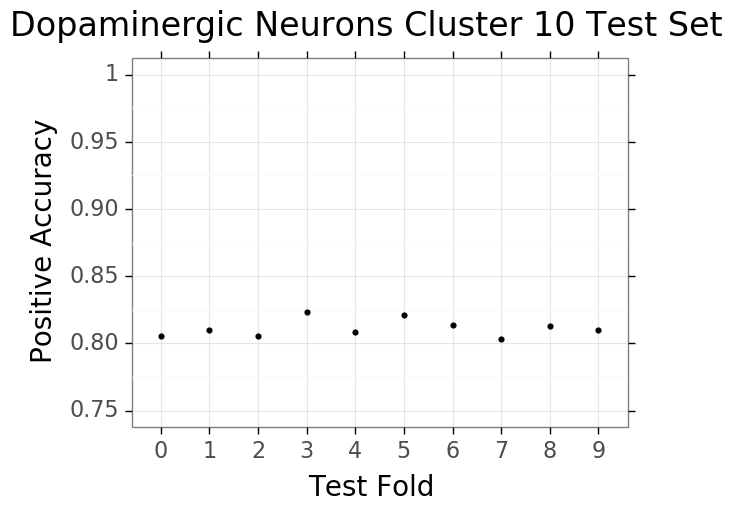

<ggplot: (8742437240780)>

In [63]:
p2

/users/annashch/miniconda3/lib/python3.7/copy.py:274: MatplotlibDeprecationWarning: 
The Bunch class was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use types.SimpleNamespace instead.
  y = func(*args)
/users/annashch/miniconda3/lib/python3.7/site-packages/plotnine-0.4.0-py3.7.egg/plotnine/scales/scale.py:99: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
/users/annashch/miniconda3/lib/python3.7/site-packages/plotnine-0.4.0-py3.7.egg/plotnine/facets/facet.py:151: MatplotlibDeprecationWarning: 
The Bunch class was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use types.SimpleNamespace instead.
  scales = Bunch()
/users/annashch/miniconda3/lib/python3.7/site-packages/plotnine-0.4.0-py3.7.egg/plotnine/facets/layout.py:147: MatplotlibDeprecationWarning: 
The Bunch class was deprecated in Matplotlib 3.0 and will

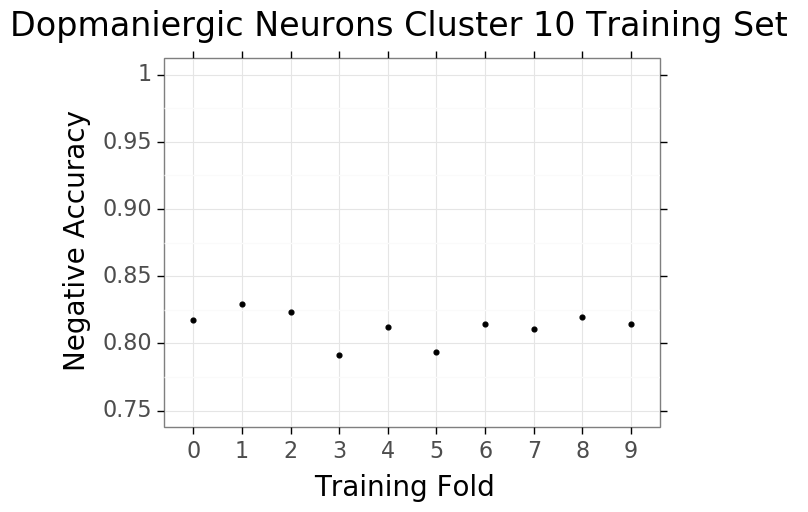

<ggplot: (8742437228068)>

In [64]:
p3